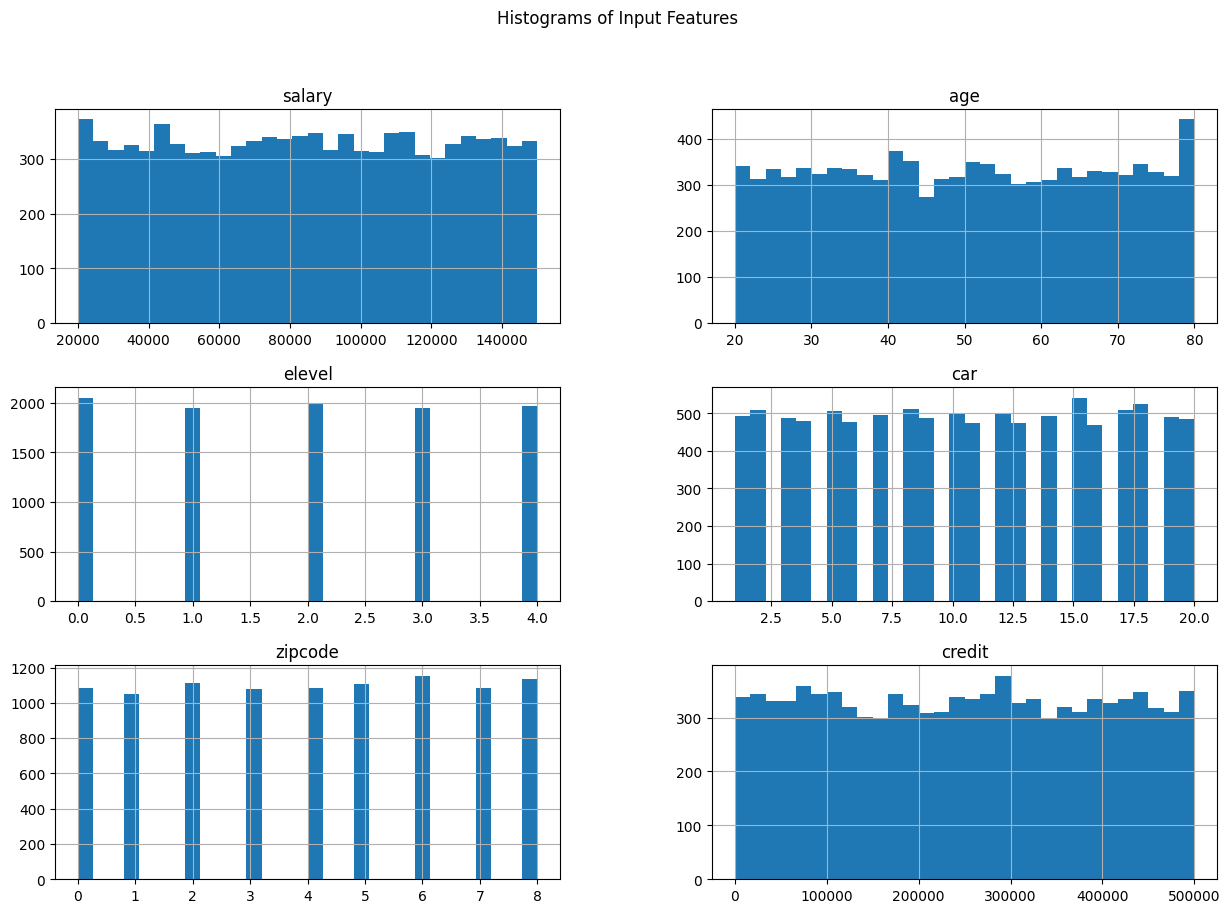

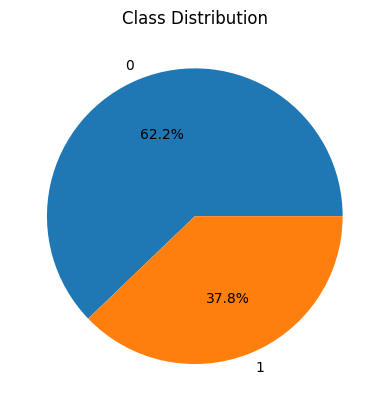

            salary  age  elevel  car  zipcode        credit  brand
0     119806.54480   45       0   14        4  442037.71130      0
1     106880.47840   63       1   11        6   45007.17883      1
2      78020.75094   23       0   15        2   48795.32279      0
3      63689.93635   51       3    6        5   40888.87736      1
4      50873.61880   20       3   14        4  352951.49770      0
...            ...  ...     ...  ...      ...           ...    ...
9893   87580.91422   75       1   18        8  282511.90950      1
9894  129181.38200   75       2    7        4  384871.36390      1
9895   97828.08884   66       2   15        0  399446.69620      1
9896   20000.00000   24       1   14        1  223204.64950      1
9897   96430.16419   34       1    2        7  224029.80700      0

[9898 rows x 7 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


# Load dataset
data = pd.read_csv("CompleteResponses.csv")

# Distribution of each column
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

class_counts = data['brand'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()
print(data)
# Normalization of data
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

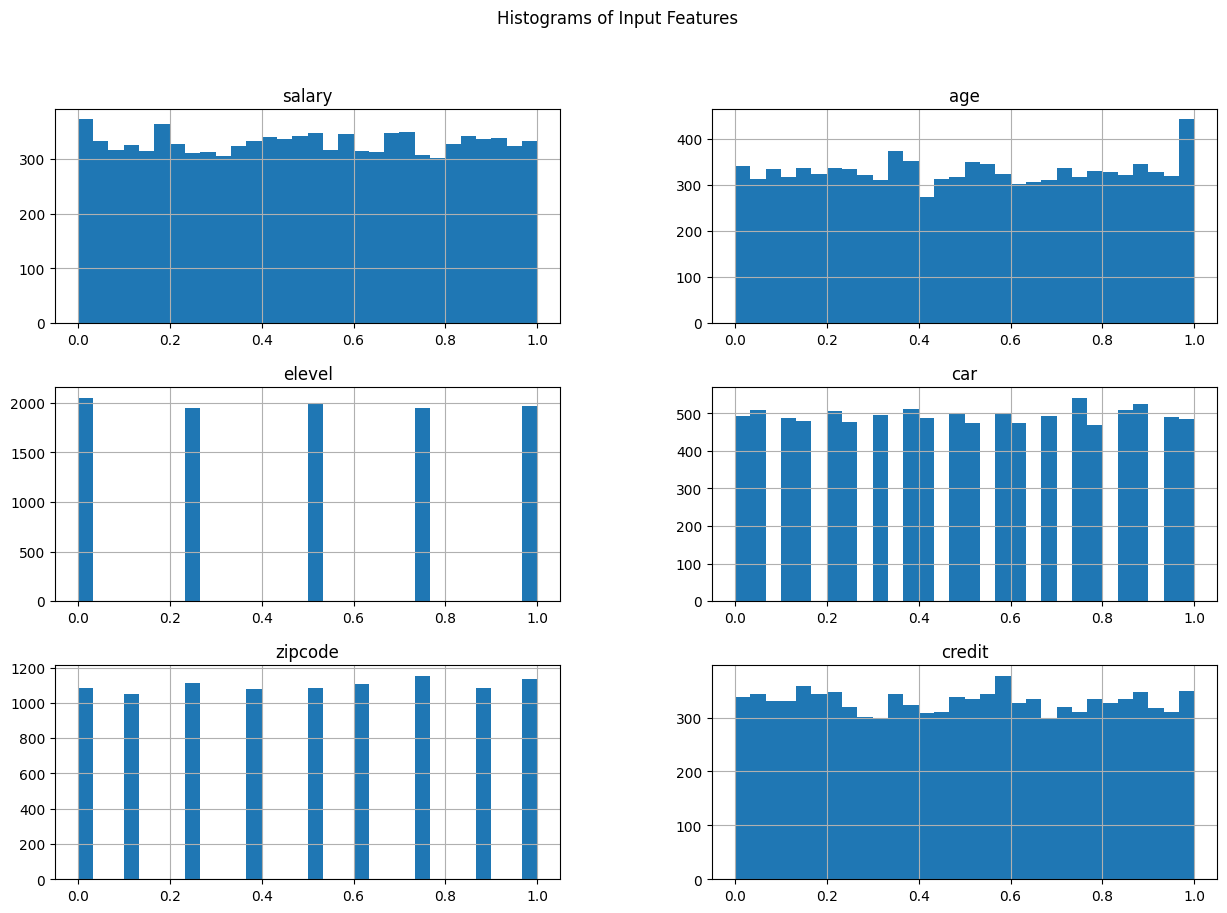

In [ ]:
# Distribution of each column
input_features = normalized_data.columns[:-1]
normalized_data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = normalized_data.drop("brand", axis=1)
y = normalized_data["brand"]
print(normalized_data)

# Train the data using Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(X, y, epochs=15, validation_split=0.2, callbacks=[checkpoint])

# Print the accuracy
best_model = tf.keras.models.load_model("best_model.h5")
_, train_accuracy = best_model.evaluate(X, y, verbose=1)
print(f"Train accuracy: {train_accuracy:.4f}")

        salary       age  elevel       car  zipcode    credit  brand
0     0.767743  0.416667    0.00  0.684211    0.500  0.884075    0.0
1     0.668311  0.716667    0.25  0.526316    0.750  0.090014    1.0
2     0.446313  0.050000    0.00  0.736842    0.250  0.097591    0.0
3     0.336076  0.516667    0.75  0.263158    0.625  0.081778    1.0
4     0.237489  0.000000    0.75  0.684211    0.500  0.705903    0.0
...        ...       ...     ...       ...      ...       ...    ...
9893  0.519853  0.916667    0.25  0.894737    1.000  0.565024    1.0
9894  0.839857  0.916667    0.50  0.315789    0.500  0.769743    1.0
9895  0.598678  0.766667    0.50  0.736842    0.000  0.798893    1.0
9896  0.000000  0.066667    0.25  0.684211    0.125  0.446409    1.0
9897  0.587924  0.233333    0.25  0.052632    0.875  0.448060    0.0

[9898 rows x 7 columns]
Epoch 1/15
231/248 [==========================>...] - ETA: 0s - loss: 0.6442 - accuracy: 0.6211
Epoch 1: val_accuracy improved from -inf to 0.64798

In [ ]:
# Train the data using Keras
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(X, y, epochs=200, validation_split=0.2, callbacks=[checkpoint])

# Print the accuracy
best_model = tf.keras.models.load_model("best_model.h5")
_, train_accuracy = best_model.evaluate(X, y, verbose=1)
print(f"Train accuracy: {train_accuracy:.4f}")

Epoch 1/50
246/248 [============================>.] - ETA: 0s - loss: 0.5631 - accuracy: 0.6902
Epoch 1: val_accuracy improved from -inf to 0.77576, saving model to best_model.h5
248/248 [==============================] - 3s 6ms/step - loss: 0.5628 - accuracy: 0.6908 - val_loss: 0.4554 - val_accuracy: 0.7758
Epoch 2/50
237/248 [===========================>..] - ETA: 0s - loss: 0.3844 - accuracy: 0.8191
Epoch 2: val_accuracy improved from 0.77576 to 0.86364, saving model to best_model.h5
248/248 [==============================] - 1s 5ms/step - loss: 0.3828 - accuracy: 0.8198 - val_loss: 0.3070 - val_accuracy: 0.8636
Epoch 3/50
236/248 [===========================>..] - ETA: 0s - loss: 0.2867 - accuracy: 0.8731
Epoch 3: val_accuracy improved from 0.86364 to 0.87576, saving model to best_model.h5
248/248 [==============================] - 1s 4ms/step - loss: 0.2866 - accuracy: 0.8733 - val_loss: 0.2650 - val_accuracy: 0.8758
Epoch 4/50
245/248 [============================>.] - ETA: 0s - 

In [ ]:

# Shuffle data
shuffled_data = normalized_data.sample(frac=1).reset_index(drop=True)

# Split data, test and validation
train_size = int(0.8 * len(shuffled_data))
X_train, X_val = shuffled_data.iloc[:train_size, :-1], shuffled_data.iloc[train_size:, :-1]
y_train, y_val = shuffled_data.iloc[:train_size, -1], shuffled_data.iloc[train_size:, -1]

# Train a deep model with a larger number of neurons for validation dataset
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_val = ModelCheckpoint("best_model_val.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint_train = ModelCheckpoint("best_model_train.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')
history_val = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[checkpoint_val, checkpoint_train])

# Print accuracy on both training and validation dataset
best_model_val = tf.keras.models.load_model("best_model_val.h5")
best_model_train = tf.keras.models.load_model("best_model_train.h5")
_, train_accuracy = best_model_train.evaluate(X_train, y_train, verbose=1)
_, val_accuracy = best_model_val.evaluate(X_val, y_val, verbose=1)
print(f"Train accuracy: {train_accuracy:.4f}, Validation accuracy: {val_accuracy:.4f}")


Epoch 1/50
243/248 [============================>.] - ETA: 0s - loss: 0.5222 - accuracy: 0.7197
Epoch 1: val_accuracy improved from -inf to 0.86364, saving model to best_model_val.h5

Epoch 1: accuracy improved from -inf to 0.72127, saving model to best_model_train.h5
248/248 [==============================] - 3s 6ms/step - loss: 0.5202 - accuracy: 0.7213 - val_loss: 0.3304 - val_accuracy: 0.8636
Epoch 2/50
242/248 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8643
Epoch 2: val_accuracy did not improve from 0.86364

Epoch 2: accuracy improved from 0.72127 to 0.86499, saving model to best_model_train.h5
248/248 [==============================] - 2s 8ms/step - loss: 0.3024 - accuracy: 0.8650 - val_loss: 0.2908 - val_accuracy: 0.8586
Epoch 3/50
243/248 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.8877
Epoch 3: val_accuracy improved from 0.86364 to 0.86768, saving model to best_model_val.h5

Epoch 3: accuracy improved from 0.86499 to 0.8

Epoch 1/50
248/248 [==============================] - 2s 3ms/step - loss: 0.6356 - accuracy: 0.6192 - val_loss: 0.5977 - val_accuracy: 0.6313
Epoch 2/50
248/248 [==============================] - 1s 3ms/step - loss: 0.5745 - accuracy: 0.6711 - val_loss: 0.5380 - val_accuracy: 0.7141
Epoch 3/50
248/248 [==============================] - 1s 3ms/step - loss: 0.5367 - accuracy: 0.7240 - val_loss: 0.5214 - val_accuracy: 0.7268
Epoch 4/50
248/248 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7315 - val_loss: 0.5147 - val_accuracy: 0.7338
Epoch 5/50
248/248 [==============================] - 1s 3ms/step - loss: 0.5274 - accuracy: 0.7285 - val_loss: 0.5134 - val_accuracy: 0.7328
Epoch 6/50
248/248 [==============================] - 1s 4ms/step - loss: 0.5273 - accuracy: 0.7305 - val_loss: 0.5168 - val_accuracy: 0.7303
Epoch 7/50
248/248 [==============================] - 1s 3ms/step - loss: 0.5256 - accuracy: 0.7294 - val_loss: 0.5134 - val_accuracy: 0.7338
Epoch 

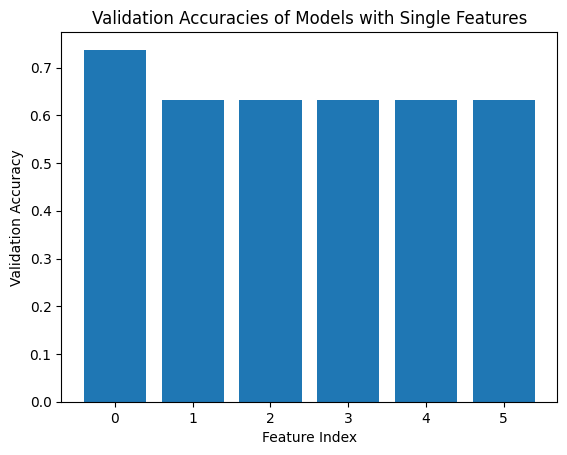

Epoch 1/50
248/248 [==============================] - 2s 3ms/step - loss: 0.6677 - accuracy: 0.6164 - val_loss: 0.6616 - val_accuracy: 0.6313
Epoch 2/50
248/248 [==============================] - 1s 2ms/step - loss: 0.6653 - accuracy: 0.6193 - val_loss: 0.6580 - val_accuracy: 0.6313
Epoch 3/50
248/248 [==============================] - 1s 3ms/step - loss: 0.6651 - accuracy: 0.6193 - val_loss: 0.6579 - val_accuracy: 0.6313
Epoch 4/50
248/248 [==============================] - 1s 2ms/step - loss: 0.6647 - accuracy: 0.6193 - val_loss: 0.6578 - val_accuracy: 0.6313
Epoch 5/50
248/248 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.6193 - val_loss: 0.6585 - val_accuracy: 0.6313
Epoch 6/50
248/248 [==============================] - 1s 2ms/step - loss: 0.6645 - accuracy: 0.6193 - val_loss: 0.6574 - val_accuracy: 0.6313
Epoch 7/50
248/248 [==============================] - 1s 3ms/step - loss: 0.6642 - accuracy: 0.6193 - val_loss: 0.6581 - val_accuracy: 0.6313
Epoch 

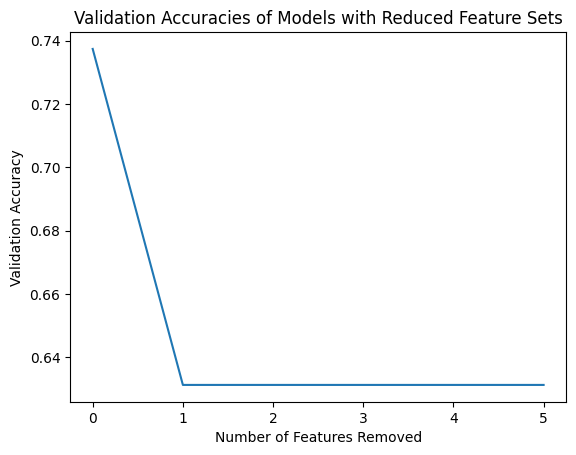

In [ ]:


# Split the data into features (X) and target (y)
X = normalized_data.drop(columns=["brand"])
y = normalized_data["brand"]

# Get number of features
n_features = X.shape[1]

# Train models with single features
single_feature_accuracies = []
for i in range(n_features):
    # Select single feature
    X_single = X.iloc[:, i:i+1]
    # Split data into training and validation sets
    train_size = int(0.8 * len(X_single))
    X_train, X_val = X_single.iloc[:train_size], X_single.iloc[train_size:]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]
    # Build and train model
    model = Sequential([
        Dense(32, activation="relu", input_shape=[1]),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # Define checkpoint to save best model
    checkpoint = ModelCheckpoint("best_single_feature_model.h5", save_best_only=True, save_weights_only=True)
    # Train model with checkpointing
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint], verbose=1)
    # Load best model and compute validation accuracy
    model.load_weights("best_single_feature_model.h5")
    _, accuracy = model.evaluate(X_val, y_val, verbose=1)
    single_feature_accuracies.append(accuracy)

# Plot single-feature accuracies
plt.bar(range(n_features), single_feature_accuracies)
plt.xlabel("Feature Index")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Models with Single Features")
plt.show()

# Train models with reduced feature sets
reduced_feature_accuracies = [max(single_feature_accuracies)]
for i in range(1, n_features):
    # Select features to keep
    features_to_keep = np.argsort(single_feature_accuracies)[:n_features-i]
    X_reduced = X.iloc[:, features_to_keep]
    # Split data into training and validation sets
    train_size = int(0.8 * len(X_reduced))
    X_train, X_val = X_reduced.iloc[:train_size], X_reduced.iloc[train_size:]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]
    # Build and train model
    model = Sequential([
        Dense(32, activation="relu", input_shape=[X_reduced.shape[1]]),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # Define checkpoint to save best model
    checkpoint = ModelCheckpoint("best_reduced_feature_model.h5", save_best_only=True, save_weights_only=True)
    # Train model with checkpointing
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint], verbose=1)
    # Load best model and compute validation accuracy
    model.load_weights("best_reduced_feature_model.h5")
    _, accuracy = model.evaluate(X_val, y_val, verbose=1)
    reduced_feature_accuracies.append(accuracy)
# Plot accuracies of models with reduced feature sets
plt.plot(range(len(reduced_feature_accuracies)), reduced_feature_accuracies)
plt.xlabel("Number of Features Removed")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Models with Reduced Feature Sets")
plt.show()
